<a href="https://colab.research.google.com/github/claudinez/Educ360_Atividade_Grafico_Clube/blob/main/Atividade_Grafico_Clube.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px

# Carregar dados
df = pd.read_csv('https://raw.githubusercontent.com/profivan-ai/cdb-Python/refs/heads/main/arquivos/compras.csv', sep=";")
df

In [ ]:
# Substituir 0 por "Não Tem" e 1 por "Sim Tem" na coluna 'clube'
# Para colunas, sempre use .map(), .apply() ou np.where()
# df['clube'] = df['clube'].map({0: 'Não', 1: 'Sim'})
# df['clube_texto'] = np.where(df['clube'] == 1, "Sim", "Não")
df['clube_texto'] = df['clube'].apply(lambda x: "Sim" if x==1 else "Não")
df

In [ ]:
# Agrupar por dia e clube
df_clube_dia = df.groupby(['dia','clube'], sort=False).agg({'valor': np.sum}).reset_index()

# Ordenar dias da semana
dias_ordenados = ["segunda-feira","terca-feira","quarta-feira","quinta-feira","sexta-feira","sabado","domingo"]
df_clube_dia['dia'] = pd.Categorical(df_clube_dia['dia'], categories=dias_ordenados, ordered=True)
df_clube_dia = df_clube_dia.sort_values('dia')
df

In [ ]:
# Gráfico de barras
fig = px.bar(
    df_clube_dia,
    x='dia',
    y='valor',
    color='clube',   # agora aparece "Sim" e "Não"
    barmode='group',
    text='valor',
    title='Gasto por Clube e Dia'
)
fig.show()

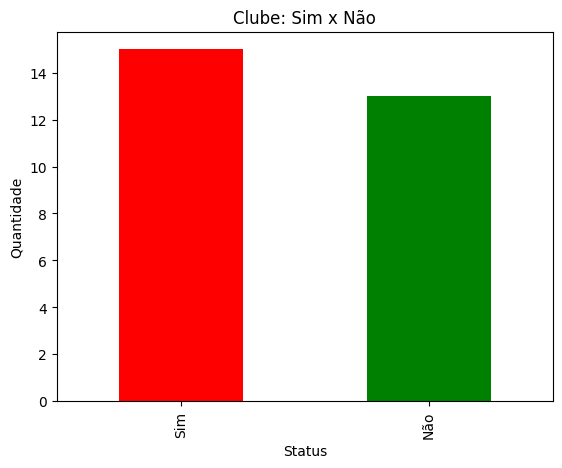

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Lendo o arquivo
df = pd.read_csv('https://raw.githubusercontent.com/profivan-ai/cdb-Python/refs/heads/main/arquivos/compras.csv', sep=";")

# A coluna chama 'clube'  0 e 1
# Criando gráfico direto usando map no value_counts
contagem = df['clube'].map({0:"Não", 1:"Sim"}).value_counts()

# Gráfico de barras
contagem.plot(kind='bar', color=['red','green'])
plt.title("Clube: Sim x Não")
plt.xlabel("Status")
plt.ylabel("Quantidade")
plt.show()


/tmp/ipython-input-2271341978.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




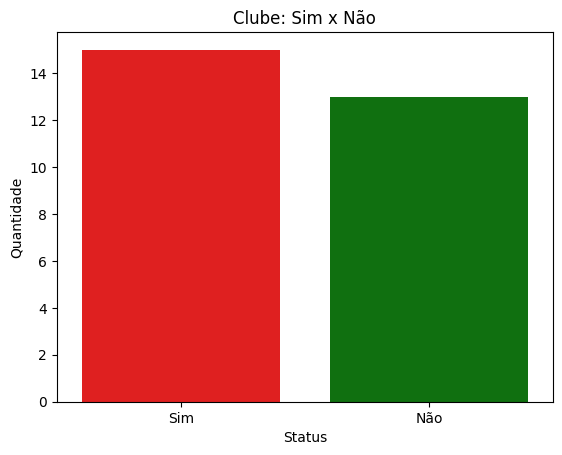

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Lendo o arquivo
df = pd.read_csv('https://raw.githubusercontent.com/profivan-ai/cdb-Python/refs/heads/main/arquivos/compras.csv', sep=";")

# Mapeando 0/1 para Não/Sim
df['clube_texto'] = df['clube'].map({0:"Não", 1:"Sim"})

# Gráfico de barras com Seaborn
sns.countplot(data=df, x='clube_texto', palette=['red', 'green'])
plt.title("Clube: Sim x Não")
plt.xlabel("Status")
plt.ylabel("Quantidade")
plt.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Lendo o arquivo
df = pd.read_csv('https://raw.githubusercontent.com/profivan-ai/cdb-Python/refs/heads/main/arquivos/compras.csv', sep=";")

# Criando gráfico e mapeando 0 → Não e 1 → Sim direto no eixo X
fig = px.bar(
    df.replace({'clube': {0: 'Não', 1: 'Sim'}}),   # converte só na exibição
    x='clube',
    title='Participação do Clube Vantagem (Sim x Não)',
    color='clube',
    color_discrete_map={'Sim':'green', 'Não':'red'}
)

# Exibindo
fig.show()


In [ ]:
# Contando os valores e aplicando o mesmo mapeamento
contagem = df['clube'].map({0:'Não', 1:'Sim'}).value_counts().reset_index()
contagem.columns = ['Status', 'Quantidade']

# Gráfico de pizza interativo
fig = px.pie(
    contagem,
    names='Status',
    values='Quantidade',
    title='Distribuição de Participantes no Clube',
    color='Status',
    color_discrete_map={'Sim':'green', 'Não':'red'},
    hole=0.4  # transforma em gráfico de rosca
)

fig.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 📥 Lendo o arquivo CSV
df = pd.read_csv('https://raw.githubusercontent.com/profivan-ai/cdb-Python/refs/heads/main/arquivos/compras.csv', sep=";")

# 🔄 Convertendo 0 e 1 para texto
df['clube_texto'] = df['clube'].map({0: 'Não', 1: 'Sim'})

# 📊 Contagem de cada categoria
contagem = df['clube_texto'].value_counts().reset_index()
contagem.columns = ['Status', 'Quantidade']

# 🧱 Criando layout com 1 linha e 2 colunas (barras + pizza)
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{'type':'bar'}, {'type':'domain'}]],
    subplot_titles=("Gráfico de Barras", "Gráfico de Rosca (Pizza)")
)

# 🔹 Gráfico de Barras
fig.add_trace(
    go.Bar(
        x=contagem['Status'],
        y=contagem['Quantidade'],
        marker_color=['red', 'green'],
        text=contagem['Quantidade'],
        textposition='auto',
        name='Barras'
    ),
    row=1, col=1
)

# 🔸 Gráfico de Pizza (Rosca)
fig.add_trace(
    go.Pie(
        labels=contagem['Status'],
        values=contagem['Quantidade'],
        hole=0.4,
        marker_colors=['red', 'green'],
        name='Pizza'
    ),
    row=1, col=2
)

# 🎨 Personalização geral
fig.update_layout(
    title_text="📊 Participação no Clube (Sim x Não)",
    title_x=0.5,
    showlegend=False,
    template="plotly_white",
    width=900,
    height=450
)

# 🚀 Exibir
fig.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Lendo dataset
df = pd.read_csv('https://raw.githubusercontent.com/profivan-ai/cdb-Python/refs/heads/main/arquivos/compras.csv', sep=";")
df['clube_texto'] = df['clube'].map({0: 'Não', 1: 'Sim'})
contagem = df['clube_texto'].value_counts().reset_index()
contagem.columns = ['Status', 'Quantidade']

# Criação do painel com 2 gráficos
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'bar'}, {'type':'domain'}]],
                    subplot_titles=('Gráfico de Barras', 'Gráfico de Rosca'))

# Barras
fig.add_trace(
    go.Bar(
        x=contagem['Status'],
        y=contagem['Quantidade'],
        marker_color=['red', 'green'],
        text=contagem['Quantidade'],
        textposition='auto'
    ),
    row=1, col=1
)

# Pizza
fig.add_trace(
    go.Pie(
        labels=contagem['Status'],
        values=contagem['Quantidade'],
        hole=0.4,
        marker_colors=['red', 'green']
    ),
    row=1, col=2
)

# Layout
fig.update_layout(
    title_text="📊 Participação no Clube (Sim x Não)",
    template="plotly_white",
    width=900,
    height=450
)

fig.show()


/tmp/ipython-input-3543616933.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




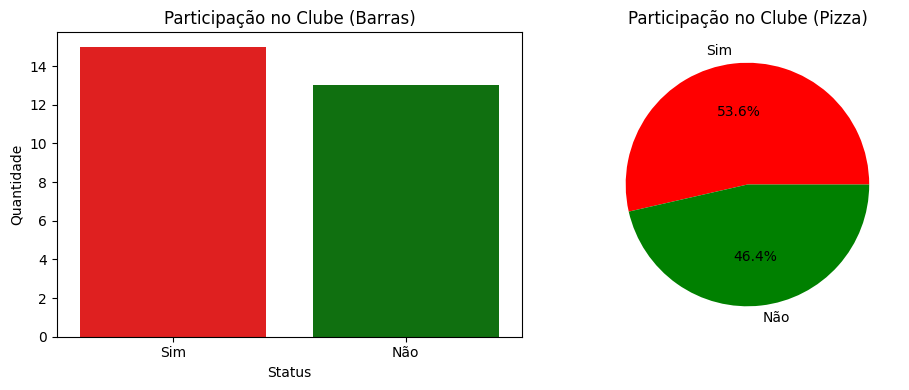

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Lendo dataset
df = pd.read_csv('https://raw.githubusercontent.com/profivan-ai/cdb-Python/refs/heads/main/arquivos/compras.csv', sep=";")
df['clube_texto'] = df['clube'].map({0: 'Não', 1: 'Sim'})

# Dashboard simples com 2 gráficos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Gráfico de barras
sns.countplot(data=df, x='clube_texto', palette=['red','green'], ax=axes[0])
axes[0].set_title('Participação no Clube (Barras)')
axes[0].set_xlabel('Status')
axes[0].set_ylabel('Quantidade')

# Gráfico de pizza (usando matplotlib)
valores = df['clube_texto'].value_counts()
axes[1].pie(valores, labels=valores.index, autopct='%1.1f%%', colors=['red','green'])
axes[1].set_title('Participação no Clube (Pizza)')

plt.tight_layout()
plt.show()


In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

sns.set_style("whitegrid")

# Dados
df = pd.read_csv('https://raw.githubusercontent.com/profivan-ai/cdb-Python/refs/heads/main/arquivos/compras.csv', sep=";")
df['clube_texto'] = df['clube'].map({0:'Não', 1:'Sim'})

# Dropdown
opcoes = ["Todos"] + sorted(df['sexo'].dropna().unique().tolist())
dropdown = widgets.Dropdown(options=opcoes, description="Sexo:")

# Output
out = widgets.Output()

def atualizar_dashboard(sexo):
    with out:
        out.clear_output(wait=True)
        df_filtrado = df if sexo=="Todos" else df[df['sexo']==sexo]

        # KPIs
        total = len(df_filtrado)
        media = df_filtrado['valor'].mean()
        print(f"Total de compras: {total}   |   Valor médio: R${media:.2f}\n")

        # Contagem Clube
        contagem = df_filtrado['clube_texto'].value_counts().reset_index()
        contagem.columns = ['Status','Quantidade']

        # Cria figura com 1 linha, 2 colunas
        fig, axes = plt.subplots(1, 2, figsize=(12,5))

        # Gráfico de barras
        ax_bar = axes[0]
        sns.barplot(
            data=contagem, x='Status', y='Quantidade', hue='Status', dodge=False,
            palette={'Sim':'green','Não':'red'}, ax=ax_bar
        )
        if ax_bar.get_legend():
            ax_bar.get_legend().remove()
        for i, q in enumerate(contagem['Quantidade']):
            ax_bar.text(i, q + 0.1, str(q), ha='center', va='bottom', fontsize=12)
        ax_bar.set_title(f"Compras por Clube (Sexo: {sexo})")

        # Gráfico de pizza
        ax_pie = axes[1]
        cores = ['green' if s=='Sim' else 'red' for s in contagem['Status']]
        ax_pie.pie(
            contagem['Quantidade'],
            labels=contagem['Status'],
            autopct='%1.1f%%',
            colors=cores,
            startangle=90
        )
        ax_pie.set_title(f"Distribuição Clube (Sexo: {sexo})")

        plt.tight_layout()
        plt.show()

# Conecta dropdown
dropdown.observe(lambda change: atualizar_dashboard(change['new'])
                 if change['type']=='change' and change['name']=='value' else None)

display(dropdown, out)
atualizar_dashboard("Todos")


Dropdown(description='Sexo:', options=('Todos', 'f', 'm'), value='Todos')

Output()

In [60]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Dados
df = pd.read_csv(
    'https://raw.githubusercontent.com/profivan-ai/cdb-Python/refs/heads/main/arquivos/compras.csv',
    sep=";"
)
df['clube_texto'] = df['clube'].map({0:'Não', 1:'Sim'})

# Opções de sexo
sexos = sorted(df['sexo'].dropna().unique().tolist())
sexos = ["Todos"] + sexos

# Função para filtrar dados
def filtrar(sexo):
    if sexo == "Todos":
        return df
    return df[df['sexo'] == sexo]

# Cria figura com subplots: 1 linha, 2 colunas
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "bar"}, {"type": "domain"}]],
    column_widths=[0.5, 0.5]
)

# Adiciona todos os gráficos (um por sexo) e esconde todos menos o inicial
for i, sexo in enumerate(sexos):
    df_filtrado = filtrar(sexo)
    contagem = df_filtrado['clube_texto'].value_counts().reset_index()
    contagem.columns = ['Status','Quantidade']

    # Gráfico de barras (coluna 1)
    fig.add_trace(
        go.Bar(
            x=contagem['Status'],
            y=contagem['Quantidade'],
            name=f"Barras - {sexo}",
            marker_color=[ 'green' if s=='Sim' else 'red' for s in contagem['Status']],
            visible=(i==0)
        ),
        row=1, col=1
    )

    # Gráfico de pizza (coluna 2)
    fig.add_trace(
        go.Pie(
            labels=contagem['Status'],
            values=contagem['Quantidade'],
            name=f"Pizza - {sexo}",
            marker_colors=[ 'green' if s=='Sim' else 'red' for s in contagem['Status']],
            visible=(i==0)
        ),
        row=1, col=2
    )

# Dropdown interativo
buttons = []
for i, sexo in enumerate(sexos):
    visibility = [False]*(len(sexos)*2)
    visibility[i*2] = True    # barra
    visibility[i*2+1] = True  # pizza
    buttons.append(dict(label=sexo,
                        method="update",
                        args=[{"visible": visibility},
                              {"title": f"Compras por Clube (Sexo: {sexo})"}]))

fig.update_layout(
    updatemenus=[dict(active=0, buttons=buttons, x=0.1, y=1.15, xanchor='left', yanchor='top')],
    title="Compras por Clube (Sexo: Todos)",
    barmode='group',
    xaxis_title="Status do Clube",
    yaxis_title="Quantidade",
    height=500
)

fig.show()
